In [316]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
import math

## Part A

In [317]:
dataset = np.load('assignment22.npy')

In [318]:
data_x = dataset[:,0]
data_y = dataset[:,1]

### linear regression

In [319]:
## 2/N (-xT y + mxTx + xTb)
def dMSE_dm(x, y, m, b):
    N = len(x)
    b_hat = np.full((N),b)
    return (2 / N) * (-x.T.dot(y) + m * x.T.dot(x) + x.T.dot(b_hat))
    
def dMSE_db(x, y, m, b):
    N = len(y)
    one = np.ones(N)
    b_hat = np.full((N),b)
    return (2 / N) * (-one.T.dot(y) + m * one.T.dot(x) + one.T.dot(b_hat))

def run_gradient_descent_conv_linear(alpha, steps, x0, y0, m, b):
    
    dists = [] 
    fvals = []
    
    mm = []
    bb = []
    
    #for k in range(steps):
    while True:
        temp_0 = m - alpha * dMSE_dm(x0, y0, m, b)
        temp_1 = b - alpha * dMSE_db(x0, y0, m, b)
        m = temp_0
        b = temp_1
        
        mm.append(m)
        bb.append(b)
        
        check = math.sqrt((dMSE_dm(x0, y0, m, b))**2 + (dMSE_db(x0, y0, m, b))**2)
        precision = 10 ** (-5)
        if check < precision:
            break

    return mm, bb

In [320]:
m_init = random.uniform(0.1,2)
b_init = random.uniform(0.1,100)

steps = 50
alpha = 0.1

In [321]:
traj_m, traj_b = run_gradient_descent_conv_linear(alpha, steps, data_x, data_y, m_init, b_init)  ##TODO: update initial values

In [322]:
m_linear_final = traj_m[-1]
b_linear_final = traj_b[-1]

m_linear_final, b_linear_final

(2.8176418216721153, 14.215949649057654)

### quadratic regression

In [323]:
#def dMSE_dm(x, y, m, b):
#    N = len(x)
#    b_hat = np.full((N),b)
#    return (2 / N) * (-x.T.dot(y) + m * x.T.dot(x) + x.T.dot(b_hat))

def dMSE_dm1(x, y, m1, m2, b):
    N = len(x)
    b_hat = np.full((N),b)
    return (2 / N) * (-x.T.dot(y) + m1 * x.T.dot(x) + m2 * (x.T.dot(x**2)) + x.T.dot(b_hat))
    
def dMSE_dm2(x, y, m1, m2, b):
    N = len(x)
    b_hat = np.full((N),b)
    return (2 / N) * (-(x**2).T.dot(y) + m1 * (x**2).T.dot(x) + m2 * (x**2).T.dot(x**2) + (x**2).T.dot(b_hat))
    
def dMSE_db(x, y, m1, m2, b):
    N = len(y)
    one = np.ones(N)
    b_hat = np.full((N),b)
    return (2 / N) * (-one.T.dot(y) + m1 * one.T.dot(x) + m2 * one.T.dot(x**2) + one.T.dot(b_hat))

def run_gradient_descent_conv_quadratic(alpha, steps, x, y, m1, m2, b):
    mm1 = []
    mm2 = []
    bb = []
    
    #for k in range(steps):
    while True:
        temp_m1 = m1 - alpha * dMSE_dm1(x, y, m1, m2, b)
        temp_m2 = m2 - alpha * dMSE_dm2(x, y, m1, m2, b)
        temp_b = b - alpha * dMSE_db(x, y, m1, m2, b)
        
        m1 = temp_m1
        m2 = temp_m2
        b = temp_b
        
        mm1.append(m1)
        mm2.append(m2)
        bb.append(b)
        
        check = math.sqrt((dMSE_dm1(x, y, m1, m2, b))**2 + (dMSE_dm2(x, y, m1, m2, b))**2 + (dMSE_db(x, y, m1, m2, b))**2)
        precision = 10 ** (-5)
        if check < precision:
            break

    return mm1, mm2, bb

In [324]:
m1_init = random.uniform(0.1,2)
m2_init = random.uniform(0.1,2)
b_init = random.uniform(0.1,100)

alpha = 0.001
steps = 50000

m1_traj, m2_traj, b_traj = run_gradient_descent_conv_quadratic(alpha, steps, data_x, data_y, m1_init, m2_init, b_init)

m1_final = m1_traj[-1]
m2_final = m2_traj[-1]
b_quad_final = b_traj[-1]

m1_final, m2_final, b_quad_final

(2.5197391752125733, 0.8905117680929417, 6.45852079502104)

In [325]:
data_x

array([ 2.80279615,  3.36499258,  2.10627673,  4.24088454, -1.46983915,
       -3.14543655,  3.23283112, -3.47311833,  1.36313714, -1.70510388,
       -2.90777332,  4.71534527, -2.35821381,  3.21897894, -2.40612945,
        2.39089568, -3.12978138, -0.72033643,  4.18651752,  1.42768446,
        4.46362679,  1.00767725, -4.00872255, -0.35585149,  1.00587603,
       -1.23385265, -2.96429364, -4.18680088, -2.8296431 , -4.22814435])

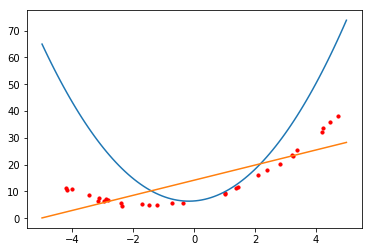

In [326]:

xx_quad=[]
yy_quad=[]

for x in np.linspace(-5, 5, num=100):
    y= m1_final * (x**2) + m2_final * x + b_quad_final
    xx_quad.append(x)
    yy_quad.append(y)

fig=plt.figure()
axes=fig.add_subplot(111)
axes.plot(xx_quad,yy_quad)

xx_linear=[]
yy_linear=[]
for x in np.linspace(-5, 5, num=100):
    y= m_linear_final * x + b_linear_final
    xx_linear.append(x)
    yy_linear.append(y)
    

axes.plot(xx_linear,yy_linear)

plt.scatter(data_x, data_y, s=10, c='red')

plt.show()


## Part B

f(x,y) = (x+2y-7)^2 + (2x+y-5)^2

In [327]:
def f(x,y):
    return (x + 2* y - 7) ** 2 + (2 * x + y - 5) ** 2

def df_dx(x,y):
    return 10*x + 8*y - 34
    
def df_dy(x,y):
    return 8*x + 10*y - 38

def run_gradient_descent_conv(alpha, steps, x, y):
    trajectories = [(x,y)]

    for k in range(steps):
        temp_x = x - alpha * df_dx(x,y)
        temp_y = y - alpha * df_dy(x,y)
        
        x = temp_x
        y = temp_y
        
        trajectories.append((x,y))
    
    return trajectories

In [328]:
x0 = 0
y0 = -10

steps = 200
alpha = 0.01

traj = run_gradient_descent_conv(alpha, steps, x0, y0)

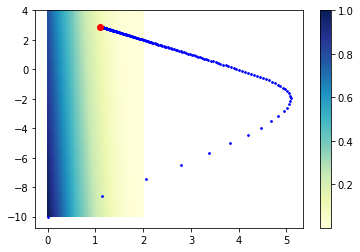

In [329]:
nrpts = 50
xs = np.linspace(0, 2, num = nrpts)
ys = np.linspace(-10, 4, num = nrpts)

heatmap = np.zeros((50, 50), dtype = float)
for i in range(50):
    for j in range(50):
        heatmap[i,j] = f(xs[i], ys[j])
        
heatmap = heatmap / np.max(np.max(heatmap))

cmap = plt.get_cmap('YlGnBu')
fig, ax = plt.subplots()
xsf = np.meshgrid(xs, ys)[0]
ysf = np.meshgrid(xs, ys)[1]
im = ax.pcolormesh(xsf, ysf, heatmap, cmap=cmap )
fig.colorbar(im, ax=ax)

#for i in range(len(traj)):
plt.scatter([i[0] for i in traj], [i[1] for i in traj], s=3, c='b')

plt.plot(traj[-1][0], traj[-1][1], 'ro')

plt.show()